#**Employee Attrition Prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####**1.Load Dataset**

In [2]:
data=pd.read_csv("/content/Employee.csv")
data.head(10)      # to view the first 10 rows of the dataset

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3.0,...,0.0,Mid,Medium,47,No,No,Yes,Fair,High,Left
6,64970,47,Male,23,Education,3681,Fair,High,High,1.0,...,3.0,Entry,Small,93,No,No,No,Good,Medium,Left
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2.0,...,4.0,Entry,Medium,88,No,No,No,Excellent,Low,Stayed
8,32714,57,Male,44,Education,3773,Good,Medium,High,1.0,...,4.0,Entry,Medium,75,No,No,No,Fair,Medium,Stayed
9,15944,24,Female,1,Healthcare,7319,Poor,High,Average,1.0,...,4.0,Entry,Large,45,No,No,Yes,Good,Low,Left


###**2.Exploratory Data Analysis**

In [3]:
# to get the number of rows and columns in the dataset

data.shape

(74498, 24)

In [4]:
# To get the basic understanding of the dataset like shape,dtype,count of the columns..

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In the dataset, there are 8 numerical and 16 object type columns in the dataset.

In [5]:
# To check for missing values

data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

Out of 24 columns in the datset there are missing values for 10 columns in the dataset.

In [6]:
# To get the basic summary statistics for the numeric columns

data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [7]:
# To get the summary of the charater columns in the dataset

data.describe(include='object')

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74498,74498,74494,74498,74494,74498,74493,74494,74493,74496,74495,74498,74498,74498,74496,74498
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40826,19322,28157,37245,44716,50157,22331,37417,29778,37230,60297,70845,62394,37182,29619,39128


In [8]:
# Check the correlation of numeric columns in the dataset

data.corr(numeric_only=True)

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
Employee ID,1.000000,0.003534,0.000441,0.000331,0.006378,0.008186,-0.004032,-0.003281
Age,0.003534,1.000000,0.537318,-0.001750,0.000655,-0.004586,0.003650,0.236337
Years at Company,0.000441,0.537318,1.000000,-0.005971,0.000942,-0.004835,0.004393,0.442580
Monthly Income,0.000331,-0.001750,-0.005971,1.000000,0.005690,-0.001910,0.001466,-0.006911
Number of Promotions,0.006378,0.000655,0.000942,0.005690,1.000000,-0.006869,-0.001452,0.005149
Distance from Home,0.008186,-0.004586,-0.004835,-0.001910,-0.006869,1.000000,-0.000985,-0.005735
Number of Dependents,-0.004032,0.003650,0.004393,0.001466,-0.001452,-0.000985,1.000000,0.000433
Company Tenure,-0.003281,0.236337,0.442580,-0.006911,0.005149,-0.005735,0.000433,1.000000


###**3.Data Preprocessing**

####**3.1 Dropping Unnecessary columns**

In [9]:
# Drop Employee id ,because these are unique for each obs and there is no use in model building

data.drop(['Employee ID'],inplace=True,axis=1)

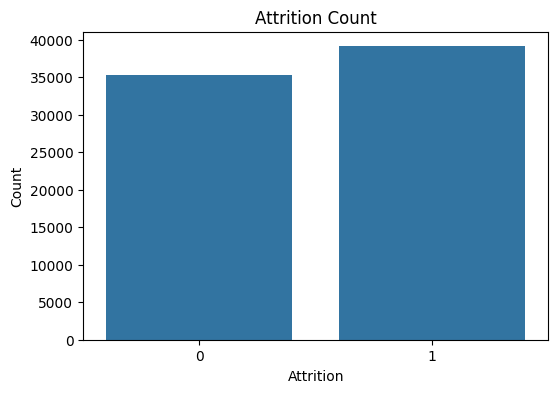

In [48]:
# Bar Plot: Attrition Count
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

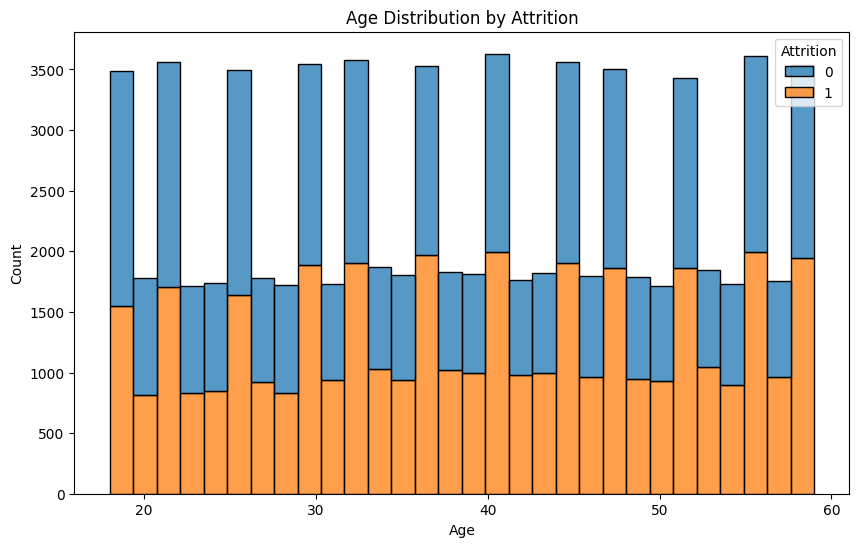

In [52]:
#  Histogram: Age Distribution by Attrition

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', bins=30)
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

####**3.2 Handling Missing Values**

In [10]:
#Since the number of missing values is very small compared to the size of the data, drop those missing values from the data

data=data.dropna()

In [11]:
data.shape

(74461, 23)

Here, only 37 rows out of 74498 were dropped.

####**3.3 Outlier Detection**

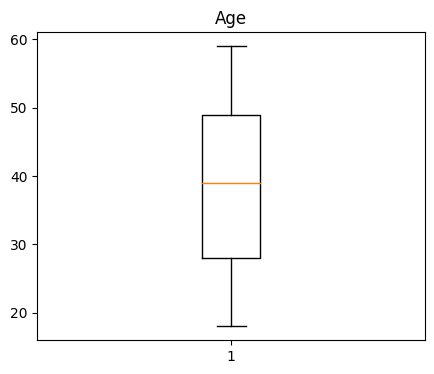

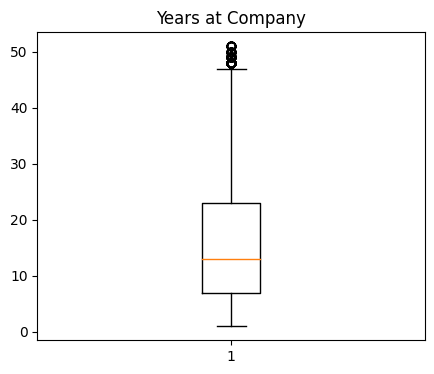

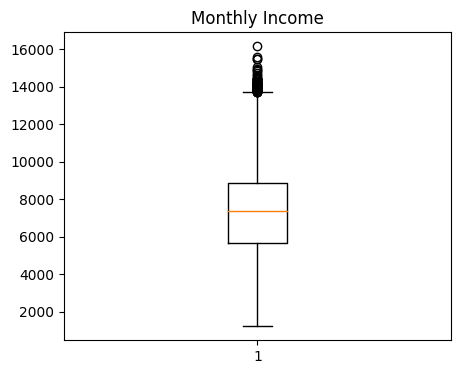

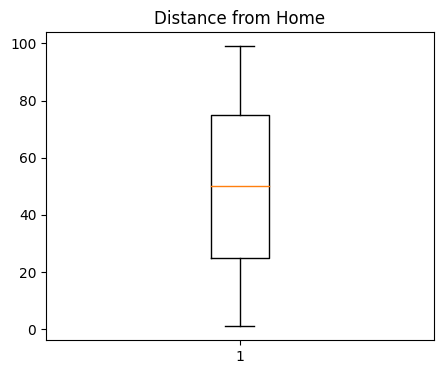

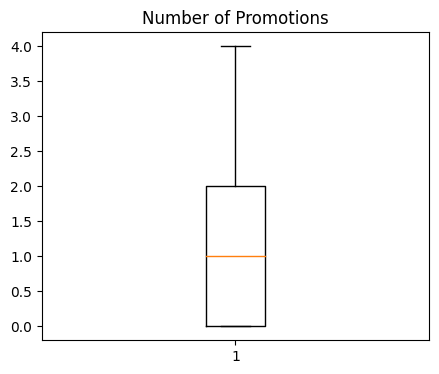

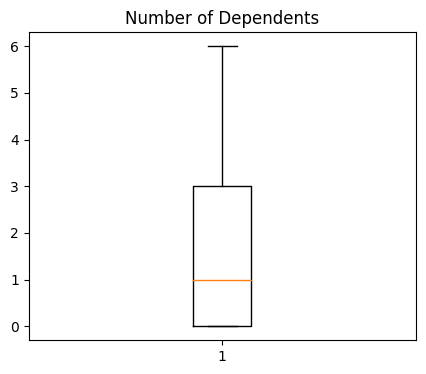

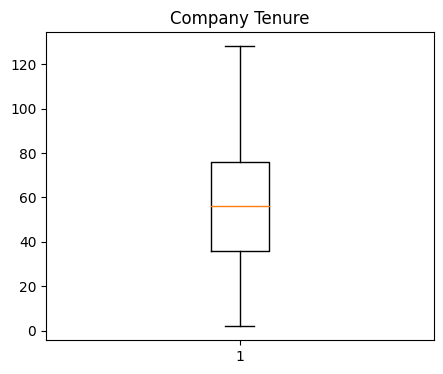

In [12]:
num_columns=['Age', 'Years at Company','Monthly Income','Distance from Home','Number of Promotions','Number of Dependents','Company Tenure']

for i in num_columns:
  plt.figure(figsize=(5,4))
  plt.boxplot(data[i])
  plt.title(i)

Here it is clear that there are outliers in  'Years at Company','Monthly Income' columns .

####**3.4 Handling Outliers**

In [13]:
for i in data[['Years at Company','Monthly Income']]:
  Q3 = np.percentile(data[i], 75, method="midpoint")
  Q1 = np.percentile(data[i], 25, method="midpoint")
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR


  outliers = data[(data[i] > upper) | (data[i] < lower)][i]


  print(f"Outliers in {i}:")
  print(outliers.to_list())

  print(f"Number of outliers in {i}: {len(outliers)}")
  print("\n")

Outliers in Years at Company:
[48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49, 49, 51, 48, 51, 48, 49, 49, 48, 50, 50, 51, 49, 49, 48, 48, 51, 49, 48, 49, 48, 51, 49, 48, 49, 49, 49, 50, 4

In [14]:
# Using clip method handling the outliers
# In clip any value less than lower value is replaced with lower and any value higner than upper value is replaced with upper

Q1=np.percentile(data['Years at Company'],25,method='midpoint')
Q3=np.percentile(data['Years at Company'],75,method='midpoint')


print("Q1 is :", Q1)
print("Q3 is :", Q3)
IQR=Q3-Q1

print(IQR)

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

print("Lower Value:", lower)
print("Upper Value:",upper)

data['Years at Company']=data['Years at Company'].clip(lower=lower,upper=upper)

Q1 is : 7.0
Q3 is : 23.0
16.0
Lower Value: -17.0
Upper Value: 47.0


In [15]:
outlier=[]
for x in data['Years at Company']:
  if((x < lower) or (x> upper)):
    outlier.append(x)

print(outlier)

[]


In [16]:
Q1=np.percentile(data['Monthly Income'],25,method='midpoint')
Q3=np.percentile(data['Monthly Income'],75,method='midpoint')


print("Q1 is :", Q1)
print("Q3 is :", Q3)
IQR=Q3-Q1

print(IQR)

LOW=Q1-1.5*IQR
UP=Q3+1.5*IQR

print("Lower Value:", LOW)
print("Upper Value:",UP)

data['Monthly Income']=data['Monthly Income'].clip(lower=LOW,upper=UP)

Q1 is : 5652.0
Q3 is : 8876.0
3224.0
Lower Value: 816.0
Upper Value: 13712.0


In [17]:
outlier=[]
for x in data['Monthly Income']:
  if((x < LOW) or (x> UP)):
    outlier.append(x)

print(outlier)

[]


In [18]:
data.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74461.000000,74461.000000,74461.000000,74461.000000,74461.000000,74461.000000,74461.000000
mean,38.528518,15.712561,7298.936625,0.833013,49.993473,1.650327,55.729966
std,12.083360,11.197240,2151.147519,0.995273,28.512592,1.553706,25.398515
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,47.000000,13712.000000,4.000000,99.000000,6.000000,128.000000


###**4. Encoding**

In [19]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

obj_col=['Gender','Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Overtime','Education Level','Marital Status','Job Level','Company Size','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition','Attrition']

for i in obj_col:
    data[i]=le.fit_transform(data[i])


In [20]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1


<Axes: >

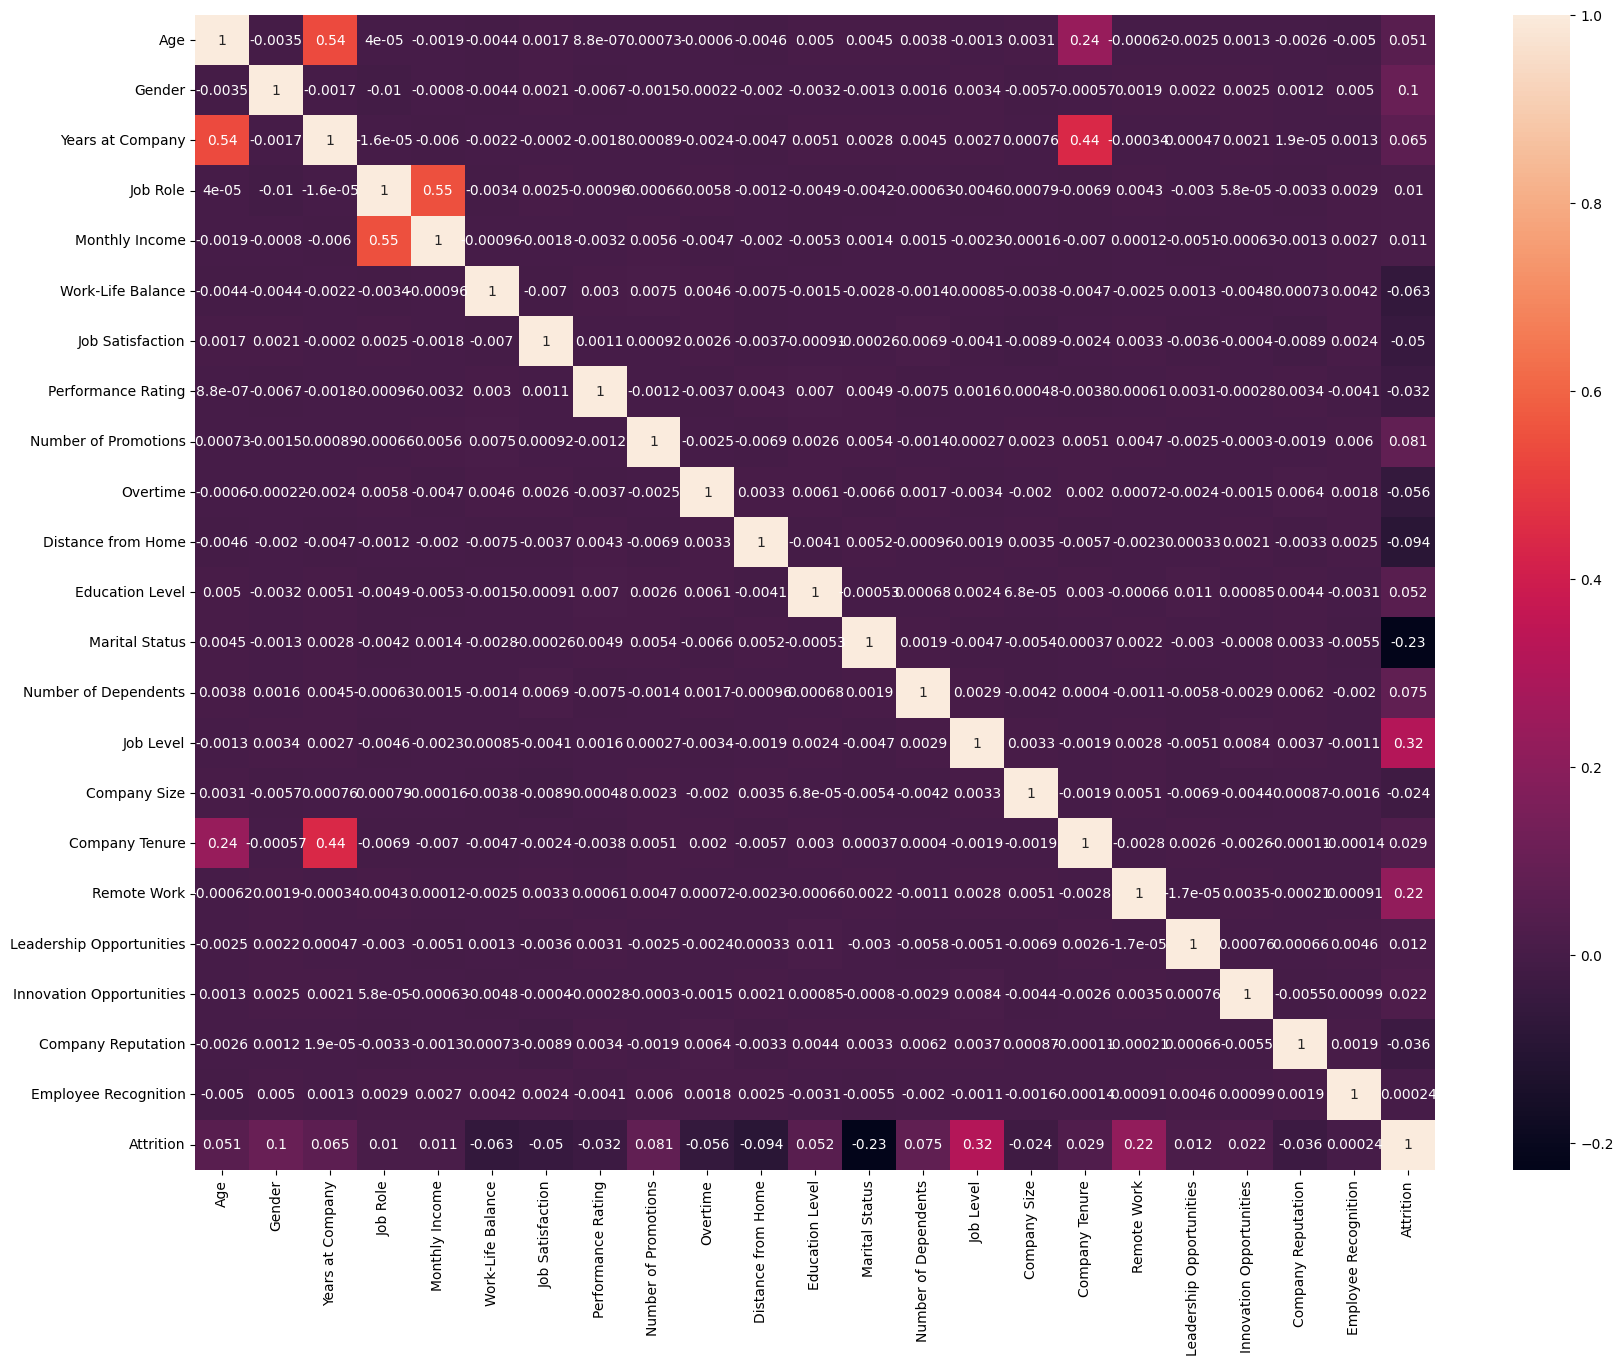

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

##**5.Model Building**

####**Spilt data**

In [22]:
y=data['Attrition']
X=data.drop('Attrition',axis=1)

In [23]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled=sc.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
from sklearn.model_selection import train_test_split
X_train_sc,X_test_sc,y_train_sc,y_test_sc=train_test_split(X_scaled,y,test_size=0.25,random_state=42)

####**5.1 Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

log_reg.fit(X_train,y_train)

log_pred=log_reg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Check the accuracy

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

print("Accuracy is:",accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='micro'))
print('recall:',recall_score(y_test,log_pred,average='micro'))
print('F1:',f1_score(y_test,log_pred,average='micro'))


Accuracy is: 0.6730769230769231
Precision: 0.6730769230769231
recall: 0.6730769230769231
F1: 0.6730769230769231


**Logistic Regreesion with scaled**

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg_sc=LogisticRegression()

log_reg_sc.fit(X_train_sc,y_train_sc)

log_pred_sc=log_reg_sc.predict(X_test_sc)

In [29]:
print("Accuracy is:",accuracy_score(y_test_sc,log_pred_sc))
print('Precision:',precision_score(y_test_sc,log_pred_sc,average='micro'))
print('recall:',recall_score(y_test_sc,log_pred_sc,average='micro'))
print('F1:',f1_score(y_test_sc,log_pred_sc,average='micro'))


Accuracy is: 0.7144929093253115
Precision: 0.7144929093253115
recall: 0.7144929093253115
F1: 0.7144929093253114


##**5.2 Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

dt_model.fit(X_train,y_train)

dt_pred=dt_model.predict(X_test)

In [31]:
print("Accuracy is:",accuracy_score(y_test,dt_pred))
print('Precision:',precision_score(y_test,dt_pred))
print('recall:',recall_score(y_test,dt_pred))
print('F1:',f1_score(y_test,dt_pred))


Accuracy is: 0.6646433175762785
Precision: 0.6818864523881045
recall: 0.68955042527339
F1: 0.6856970246186377


##**Decision Tree with Scaled**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt_mod=DecisionTreeClassifier()

dt_mod.fit(X_train_sc,y_train_sc)

dt_prd=dt_mod.predict(X_test_sc)

In [33]:
print("Accuracy is:",accuracy_score(y_test_sc,dt_prd))
print('Precision:',precision_score(y_test_sc,dt_prd))
print('recall:',recall_score(y_test_sc,dt_prd))
print('F1:',f1_score(y_test_sc,dt_prd))

Accuracy is: 0.6675440481306403
Precision: 0.685369532428356
recall: 0.6901579586877278
F1: 0.6877554109278038


###**5.3 Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

rf_model.fit(X_train,y_train)

rf_pred=rf_model.predict(X_test)

In [35]:
print("Accuracy is:",accuracy_score(y_test,rf_pred))
print('Precision:',precision_score(y_test,rf_pred))
print('recall:',recall_score(y_test,rf_pred))
print('F1:',f1_score(y_test,rf_pred))

Accuracy is: 0.7423721529866781
Precision: 0.7586558044806517
recall: 0.7543539894694208
F1: 0.7564987814784727


##**Random Forest with scaled**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier()

rf_mod.fit(X_train_sc,y_train_sc)

rf_prd=rf_mod.predict(X_test_sc)

In [37]:
print("Accuracy is:",accuracy_score(y_test_sc,rf_prd))
print('Precision:',precision_score(y_test_sc,rf_prd))
print('recall:',recall_score(y_test_sc,rf_prd))
print('F1:',f1_score(y_test_sc,rf_prd))

Accuracy is: 0.7454340352385045
Precision: 0.762279179005412
recall: 0.7558728230052653
F1: 0.7590624841120546


###**5.4 KNN**

Text(0, 0.5, 'Metric K')

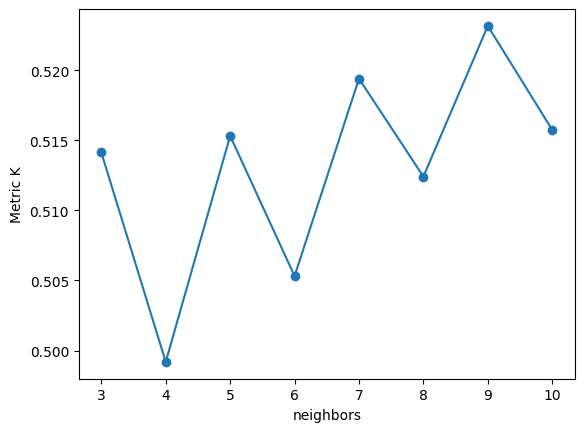

In [38]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbours=np.arange(3,11)

for k in neighbours:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  knn_model.fit(X_train,y_train)
  knn_pred=knn_model.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

plt.plot(neighbours,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('Metric K')

In [39]:
classifier=KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [40]:
print("Accuracy is:",accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred))
print('recall:',recall_score(y_test,knn_pred))
print('F1:',f1_score(y_test,knn_pred))

Accuracy is: 0.5231521272024066
Precision: 0.5479688850475367
recall: 0.5777642770352369
F1: 0.5624722756173295


##**5.5 SVM**

In [41]:

# from sklearn.svm import SVC
# sv_model=SVC()

# sv_model.fit(X_train,y_train)

# sv_pred=sv_model.predict(X_test)


In [42]:
# print("Accuracy is:",accuracy_score(y_test,sv_pred))
# print('Precision:',precision_score(y_test,sv_pred))
# print('recall:',recall_score(y_test,sv_pred))
# print('F1:',f1_score(y_test,sv_pred))

##**SVM With Scaled**

In [43]:
# from sklearn.svm import SVC
# sv_mod=SVC()

# sv_mod.fit(X_train_sc,y_train_sc)

# sv_prd=sv_mod.predict(X_test_sc)

In [44]:
# print('Precision:',precision_score(y_test_sc,sv_prd))
# print('recall:',recall_score(y_test_sc,sv_prd))
# print('F1:',f1_score(y_test_sc,sv_prd))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5)
scores

Here We came to aconclusion that Our Random forest model performed well because it has high accuracy of 0.74.